In [3]:
import json
import numpy as np
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
from ripe.atlas.cousteau import (
  Ping,
  Traceroute,
    AtlasSource,
    AtlasResultsRequest,
    AtlasCreateRequest,
    Measurement
)
import pandas as pd

In [6]:
def retreive_msm(msm):
    kwargs = {
        "msm_id": msm
    }

    is_success, results = AtlasResultsRequest(**kwargs).create()
    return results

In [4]:
software_msms = [86443656,86443657,86443658,86443659,86443660,86443661,86443662,86443663,86443664,86443665]
hardware_msms = [86443691,86443693,86443694,86443695,86443696,86443697,86443698,86443699,86443700,86443701]

In [29]:
software_probes = [1001544,1003388,1005331,1006831,1009420]
hardware_probes = [10342,14164,14166,21003,54445]

In [30]:
retreive_msm(86443691)

[{'fw': 5080,
  'mver': '2.6.2',
  'lts': 24,
  'dst_name': '73.83.220.129',
  'af': 4,
  'dst_addr': '73.83.220.129',
  'src_addr': '172.17.0.58',
  'proto': 'ICMP',
  'ttl': 47,
  'size': 48,
  'result': [{'rtt': 26.955562}, {'rtt': 23.941773}, {'rtt': 35.416996}],
  'dup': 0,
  'rcvd': 3,
  'sent': 3,
  'min': 23.941773,
  'max': 35.416996,
  'avg': 28.771443666666666,
  'msm_id': 86443691,
  'prb_id': 10342,
  'timestamp': 1738118743,
  'msm_name': 'Ping',
  'from': '50.52.117.244',
  'type': 'ping',
  'group_id': 86443691,
  'step': None,
  'stored_timestamp': 1738118744},
 {'fw': 5080,
  'mver': '2.6.2',
  'lts': 19,
  'dst_name': '73.83.220.129',
  'af': 4,
  'dst_addr': '73.83.220.129',
  'src_addr': '10.0.0.208',
  'proto': 'ICMP',
  'ttl': 55,
  'size': 48,
  'result': [{'rtt': 36.369058}, {'rtt': 38.353317}, {'rtt': 42.029031}],
  'dup': 0,
  'rcvd': 3,
  'sent': 3,
  'min': 36.369058,
  'max': 42.029031,
  'avg': 38.917135333333334,
  'msm_id': 86443691,
  'prb_id': 14164,


In [36]:
soft_dict = dict((key,[]) for key in software_probes)
hard_dict = dict((key,[]) for key in hardware_probes)

In [37]:
#Getting Software Values
for msm in software_msms:
    results = retreive_msm(msm)
    if type(results) == dict and 'Failed' in results.keys():
        continue
    for values in results:
        try:
            soft_dict[values['prb_id']].append(values['min'])
        except KeyError:
            continue

In [38]:
#Getting Hardware Values
for msm in hardware_msms:
    results = retreive_msm(msm)
    if type(results) == dict and 'Failed' in results.keys():
        continue
    for values in results:
        hard_dict[values['prb_id']].append(values['min'])

In [39]:
soft_dict

{1001544: [36.452114,
  36.748036,
  42.680387,
  38.48502,
  31.718009,
  36.16475,
  30.669154,
  34.799404,
  -1,
  43.391979],
 1003388: [21.544073,
  30.187543,
  21.781779,
  21.470701,
  23.617875,
  23.08494,
  22.033727,
  21.444901,
  -1,
  23.39726],
 1005331: [17.492675,
  26.967148,
  24.178537,
  20.779173,
  21.50796,
  23.401632,
  22.872585,
  23.092102,
  -1,
  21.365902],
 1006831: [62.692332,
  71.975746,
  28.801656,
  65.348045,
  35.137364,
  67.310363,
  66.193186,
  33.091031,
  -1,
  66.471235],
 1009420: [20.359418,
  28.981335,
  21.738296,
  22.105647,
  18.832108,
  21.269886,
  21.528574,
  25.912402,
  -1,
  22.242603]}

In [40]:
hard_dict

{10342: [23.941773,
  31.415573,
  20.866517,
  25.494204,
  26.695906,
  25.914258,
  24.709821,
  25.918428,
  -1,
  24.116148],
 14164: [36.369058,
  21.968816,
  37.206592,
  40.743672,
  40.103118,
  41.050814,
  38.483597,
  36.548063,
  -1,
  30.4051],
 14166: [29.247146,
  20.993078,
  35.340085,
  35.339054,
  32.227849,
  30.447315,
  27.750962,
  35.540733,
  -1,
  35.382078],
 21003: [45.264103,
  54.679286,
  46.286961,
  48.521676,
  47.991883,
  45.922995,
  47.704172,
  48.96328,
  -1,
  50.992476],
 54445: [20.167583,
  30.224333,
  25.883083,
  23.372083,
  23.34375,
  26.137,
  24.12775,
  26.032917,
  -1,
  25.718833]}

In [41]:
def cdf(data_all,bin_size,typ):
    cdfs = []
    for key in data_all.keys():
        data = data_all[key]
        # getting data of the histogram 
        count, bins_count = np.histogram(data, range(0,60)) 
        
        # finding the PDF of the histogram using count values
        pdf = count / sum(count) 
        
        # using numpy np.cumsum to calculate the CDF 
        # We can also find using the PDF values by looping and adding 
        cdf = np.cumsum(pdf)
        plt.plot(bins_count[1:], cdf, label=f"CDF : {key}")
    plt.title(f"CDF of Min RTT to 10 IPs from {typ} Probes")
    plt.xlabel("Min RTTs in ms")
    plt.ylabel("Percentage of Values in a given Bin/Range of Min RTTs")
    plt.legend()
    plt.show()

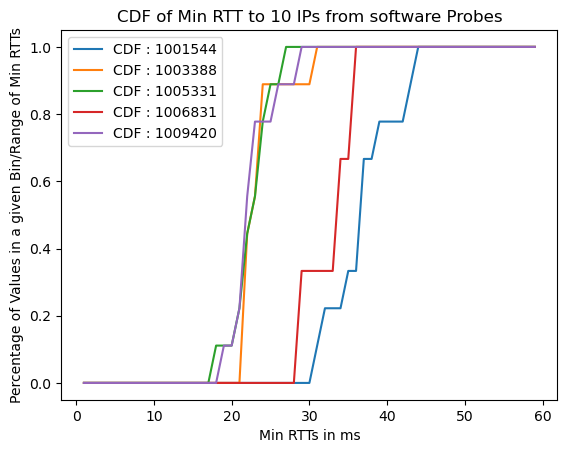

In [42]:
cdf(soft_dict,1000,'software')

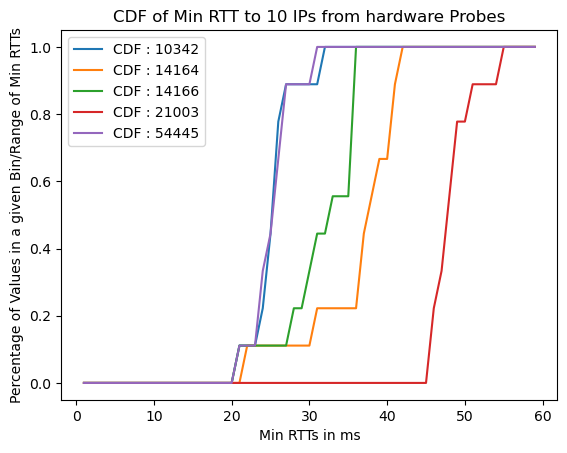

In [43]:
cdf(hard_dict,1000,'hardware')